In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

In [5]:
ecomm = pd.read_csv('datasets/E-commerce.csv', index_col=0)

ecomm.sample(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9228,868,39,3,1,2,General,Tops,Knits
691,1059,48,5,1,2,General,Bottoms,Pants
19559,1059,33,2,0,1,General,Bottoms,Pants
10167,1096,35,5,1,0,General,Dresses,Dresses
17897,861,42,2,0,1,General,Tops,Knits
9796,741,46,5,1,1,Initmates,Intimate,Swim
17642,918,58,5,1,6,General,Tops,Fine gauge
12430,267,45,5,1,0,Initmates,Intimate,Sleep
9123,832,48,4,1,0,General,Tops,Blouses
5125,1078,40,5,1,1,General,Dresses,Dresses


In [6]:
ecomm.shape

(23472, 8)

In [8]:
ecomm = ecomm[['Recommended IND', 'Rating']]

ecomm.head()

,Recommended IND,Rating
0,1,4
1,1,5
2,0,3
3,1,5
4,1,5


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

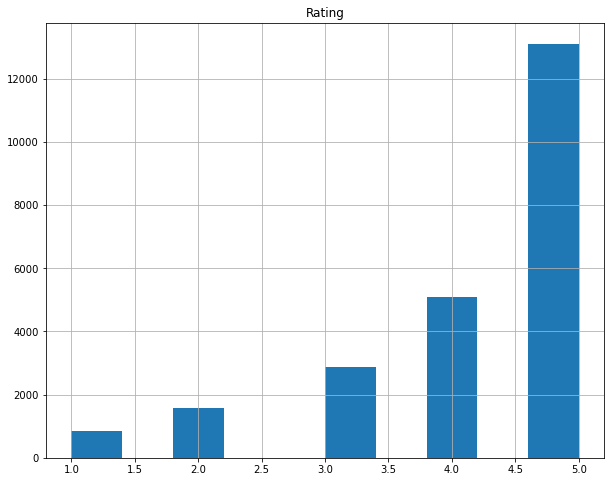

In [9]:
ecomm[['Rating']].hist(figsize=(10, 8))

In [10]:
df = pd.crosstab(ecomm['Recommended IND'], ecomm['Rating'])

df

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


In [11]:
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(df.values)

In [12]:
# Pearson's chi2 statistic tests for independence of two categorical variables

In [13]:
print('Chi2 stats: {}'.format(round(chi2, 3)))

Chi2 stats: 16711.664


In [15]:
print('The p-values: {}'.format(p_value))

The p-values: 0.0


In [16]:
# This Chi2 test was significant because the p-value is 0

In [17]:
print('The degrees of freedom: {}'.format(degrees_of_freedom))

The degrees of freedom: 4


In [18]:
expected_values

array([[  149.66019087,   278.16888207,   510.30214724,   902.40473756,
         2331.46404226],
       [  692.33980913,  1286.83111793,  2360.69785276,  4174.59526244,
        10785.53595774]])

In [19]:
expected_df = pd.DataFrame({
    '0': expected_values[0],
    '1': expected_values[1]
})

In [20]:
expected_df

,0,1
0,149.660191,692.339809
1,278.168882,1286.831118
2,510.302147,2360.697853
3,902.404738,4174.595262
4,2331.464042,10785.535958


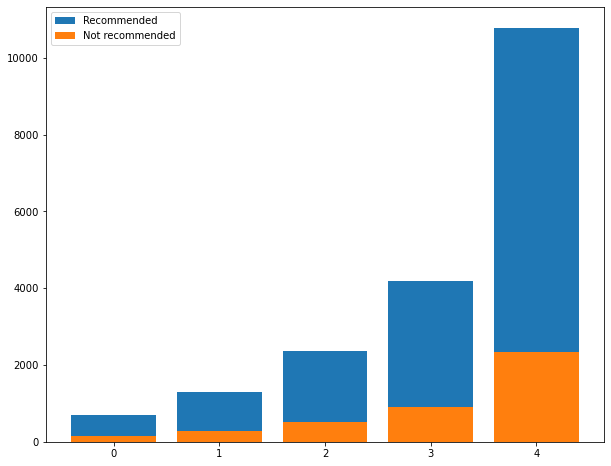

In [23]:
plt.figure(figsize=(10, 8))

plt.bar(expected_df.index, expected_df['1'], label='Recommended')
plt.bar(expected_df.index, expected_df['0'], label='Not recommended')

plt.legend()

In [25]:
rec_rat = ecomm[ecomm['Recommended IND'] == 1] # recommended ratings
nrec_rat = ecomm[ecomm['Recommended IND'] == 0] # not recommended ratings


In [26]:
rec_rat.shape, nrec_rat.shape

((19300, 2), (4172, 2))

In [27]:
rec_rat.sample(10)

,Recommended IND,Rating
11076,1,4
11048,1,5
738,1,3
15194,1,5
1065,1,5
21021,1,5
17331,1,5
14479,1,5
8547,1,5
13080,1,5


In [28]:
nrec_rat.sample(10)

,Recommended IND,Rating
8653,0,2
20700,0,3
18760,0,2
20476,0,3
13851,0,3
2149,0,1
13651,0,3
20254,0,1
18720,0,2
71,0,2


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

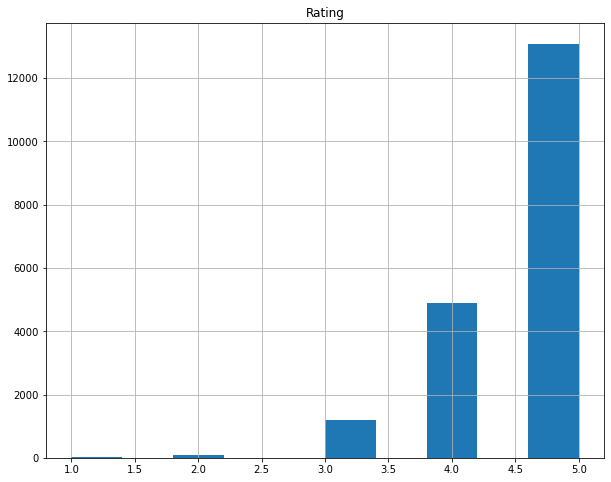

In [29]:
rec_rat[['Rating']].hist(figsize=(10, 8))

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

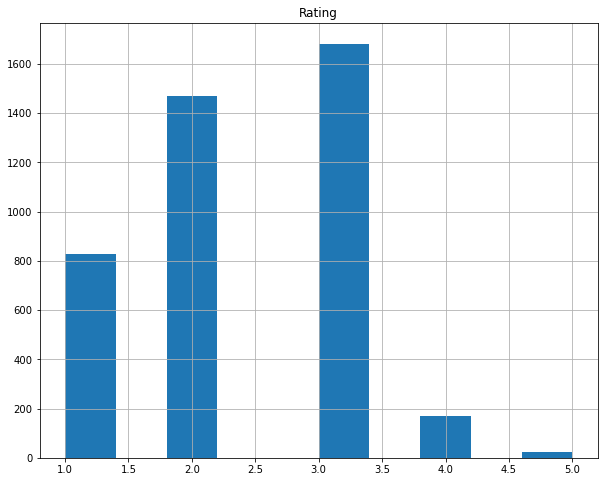

In [31]:
nrec_rat[['Rating']].hist(figsize=(10, 8))

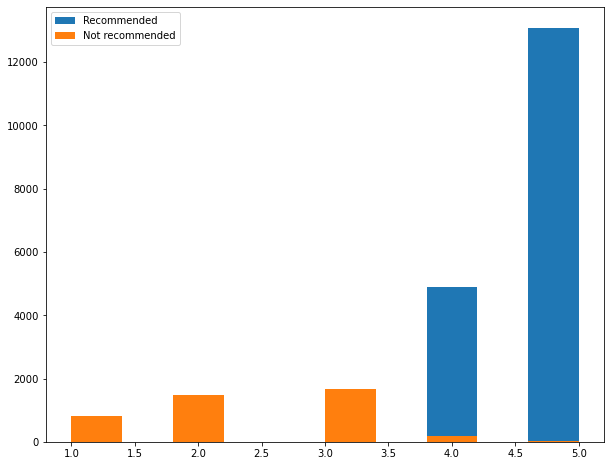

In [33]:
plt.figure(figsize=(10, 8))

plt.hist(rec_rat['Rating'], label='Recommended')
plt.hist(nrec_rat['Rating'], label='Not recommended')

plt.legend()

In [34]:
# The recommendations are not independent of ratings